# Quantum Walkers on a Ring

We consider the XXZ spin-1/2 chain on a discrete ring of length L. In particular, we consider the case when there is only one up-spin and the rest are down-spins. Additionally, we take the initial conditions with the up-spin located at site 1 at time t=0. We plot the probability function of finding the up-spin at site $x\,(mod\,L)$ at time $t \geq 0$. 

## 3D-plotting tutorial

We start with some sample coode to to see how to do 3D plots.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_1089/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


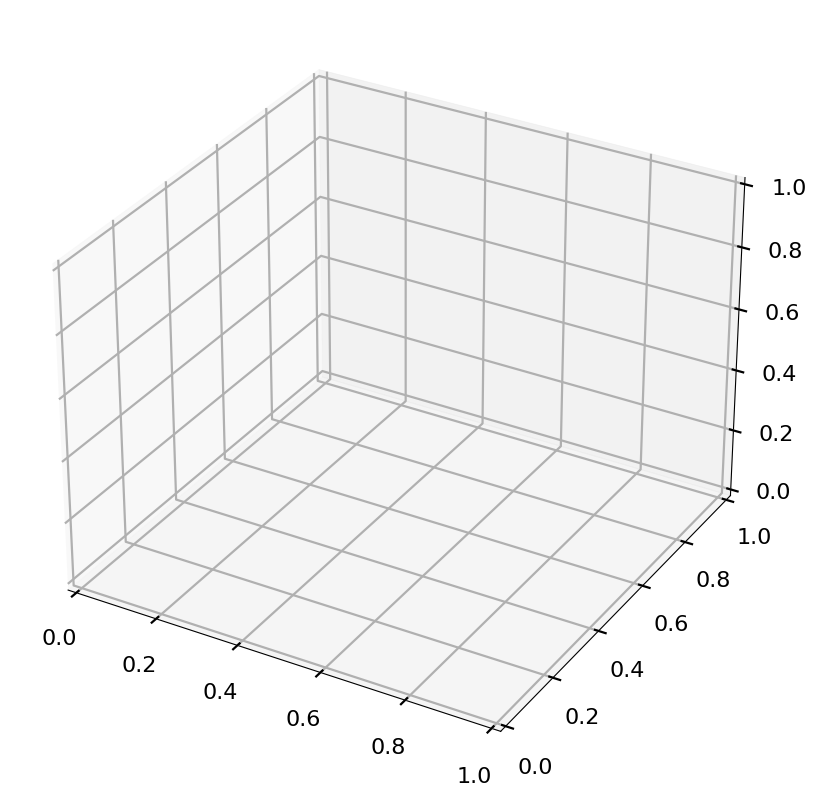

In [2]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
plt.show()

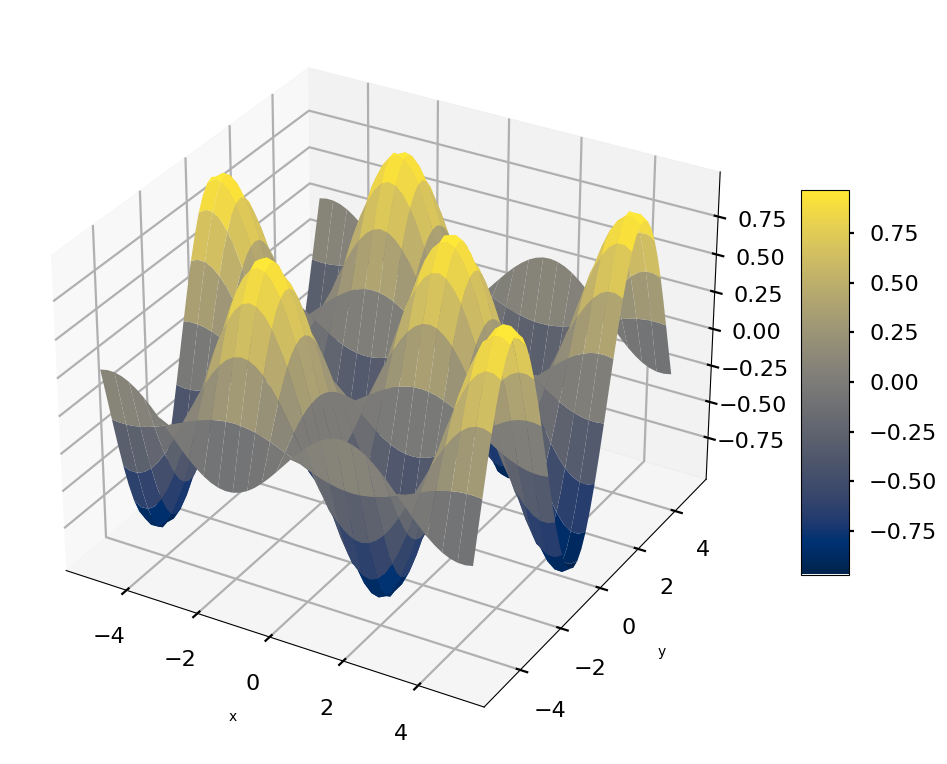

In [3]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

## Probability function

Below, we define the probability function. This probability function is derived using the coordinate Bethe Ansatz.  
  
$P(x;t) = \sum_{l_1, l_2 =1}^L L^{-2} e^{2 \pi i (l_1 + l_2)(x-1-L)/L} e^{-2i(t/\hbar)(\cos(2 \pi l_1/L) - \cos(2 \pi i l_2/L) )}$. 

The probability that we find an up-spin at site $x\,(mod\, L)$ at time $t \geq 0$.

In [4]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

def prob_fun(x, t, l, h):
    values =[]
    temp = 0
    for i in range(l):
        for k in range(l):
            temp = (1/l)*(1/l)*np.exp(2 *np.pi*(x-l-1)*(1/l)*(1j) *(i+k) )*np.exp(-2j*t*(1/h)*(np.cos(2*np.pi*(i/l)) -np.cos(2*np.pi*(k/l))))
            temp = temp.real
            values. append(temp)
    temp = sum(values)
    return temp

/tmp/ipykernel_1089/2551188706.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Simple check. We check that the probability function adds up to one at some time $t> 0$.

In [5]:
l=10
t = 0.5
vals =[]
for x in range(l):
    vals.append(prob_fun(x, t, l, 1))
print(vals)
print(sum(vals))

[0.19364452262378617, 0.585527498708488, 0.19364452262378642, 0.01320278919618581, 0.0003827836023714559, 6.030465565194654e-06, 2.4951569520953454e-07, 6.030465565071055e-06, 0.00038278360237097714, 0.01320278919618584]
1.0


### Probability function for $L = 41$ and $0 \leq t \leq 22$

In [6]:
l = 20

x = np.arange(-l+1, l+2, 1)
t = np.arange(0, l+2, 0.01)


X, T = np.meshgrid(x, t)
Z = prob_fun(X, T, 2*l +1, 1)

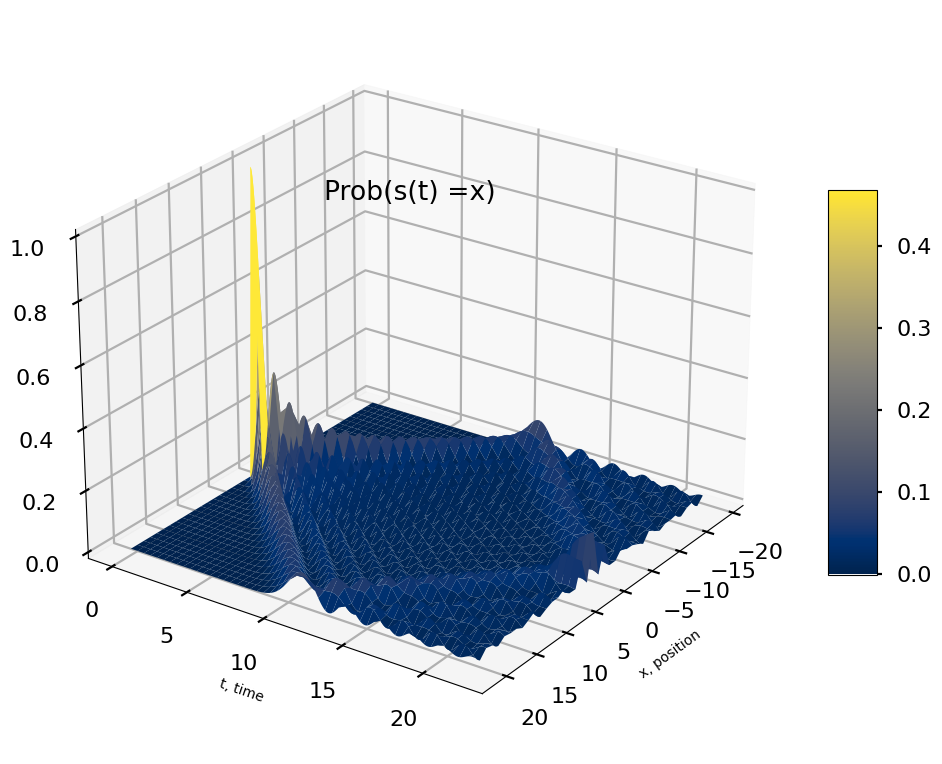

In [7]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x, position', labelpad=15)
ax.set_ylabel('t, time', labelpad=15) 
#ax.set_zlabel('z', labelpad=20)

ax.set_title('Prob(s(t) =x)', y=1.0, pad=-94)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

Note that the probability function is localized initially. Then, the probability spreads linearly on both sides until both waves collide on the other side of the ring.

### Probability function for $L=41$ and $20 \leq t \leq 40$

In [8]:
l = 20

x = np.arange(-l+1, l+2, 1)
t = np.arange(l, 2*l, 0.01)


X, T = np.meshgrid(x, t)
Z = prob_fun(X, T, 2*l +1, 1)

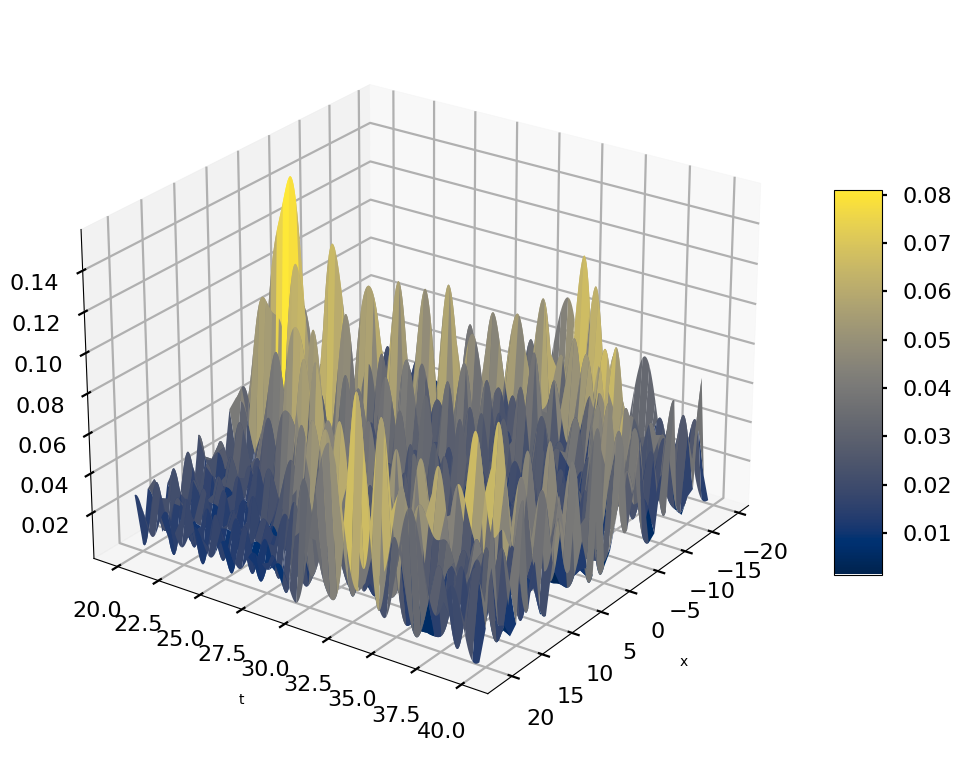

In [9]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)


ax.view_init(25, 35)

plt.show()

Note that we have a similar patter as in the previous plot, but there is some addtion noise.

### Probability function for $L =41, \hbar = 1$ and $2000 \leq t \leq 2040$

In [10]:
l = 20

x = np.arange(-l+1, l+2, 1)
t = np.arange(100*l, 102*l, 0.01)


X, T = np.meshgrid(x, t)
Z = prob_fun(X, T, 2*l +1, 1)

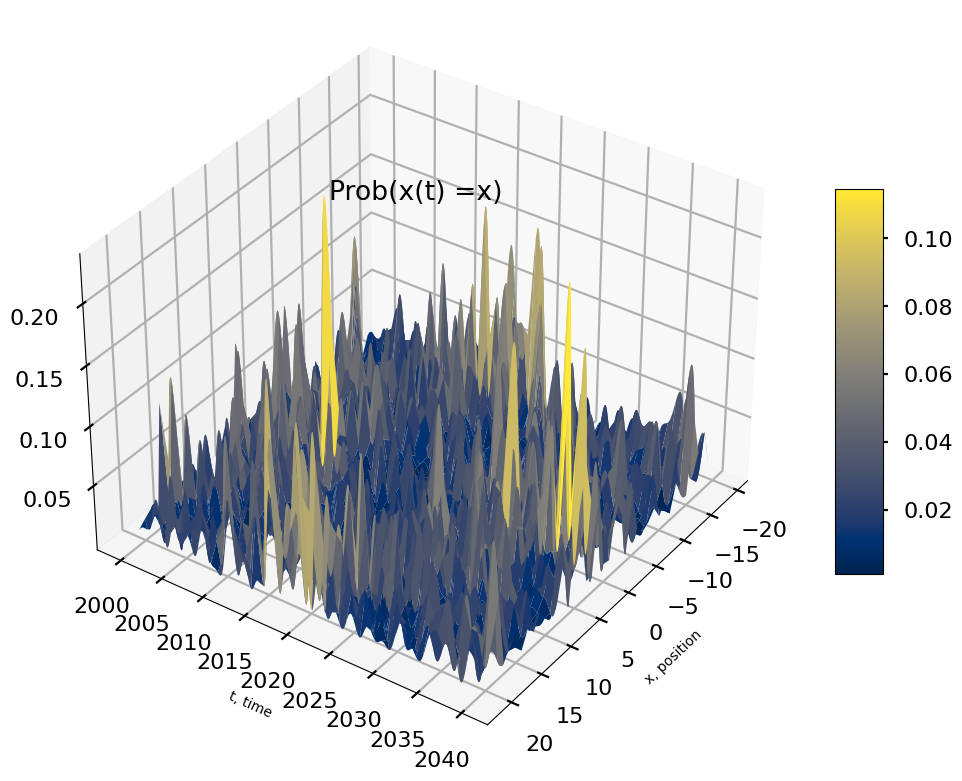

In [11]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x, position', labelpad=15)
ax.set_ylabel('t, time', labelpad=15) 
#ax.set_zlabel('z', labelpad=20)
ax.set_title('Prob(x(t) =x)', y=1.0, pad=-94)

fig.colorbar(surf, shrink=0.5, aspect=8)


ax.view_init(35, 35)

plt.show()

There is additional noise in this plot, but there is still some semblance/signature of the original pattern. In particular, note the regions of high peaks and low valleys.

### Probability function for $L=41, \hbar =1$ and $20000 \leq t \leq 20040$.

In [12]:
l = 20

x = np.arange(-l+1, l+2, 1)
t = np.arange(1000*l, 1002*l, 0.01)


X, T = np.meshgrid(x, t)
Z = prob_fun(X, T, 2*l +1, 1)

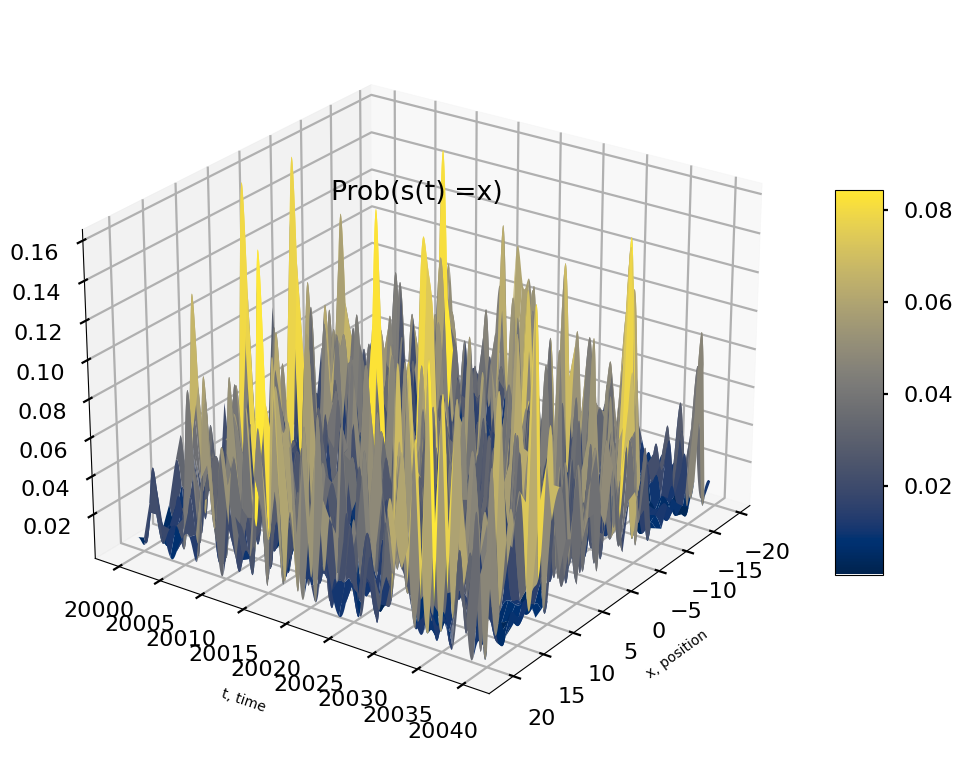

In [13]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x, position', labelpad=15)
ax.set_ylabel('t, time', labelpad=20) 
#ax.set_zlabel('z', labelpad=20)
ax.set_title('Prob(s(t) =x)', y=1.0, pad=-94)

fig.colorbar(surf, shrink=0.5, aspect=8)


ax.view_init(25, 35)

plt.show()

There is still noise but, again, there is still is a semblence/signature from the original pattern. There are peaks and valleys.  

**Question:** Can we determine the initial conditions for this model given the statistics for large $t$? 